### Campaña de Marketing Bancario

#### 1.- Importacion de data y librerias

In [1]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.feature_selection import chi2, SelectKBest
import numpy as np
from joblib import dump
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
dataframe = pd.read_csv(url, sep=";")
guardar = "/workspaces/Tutorial-de-Proyecto-de-Regresi-n-Log-stica/data/raw/bank-marketing.csv"
dataframe.to_csv(guardar, index=False)
dataframe.head()





,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

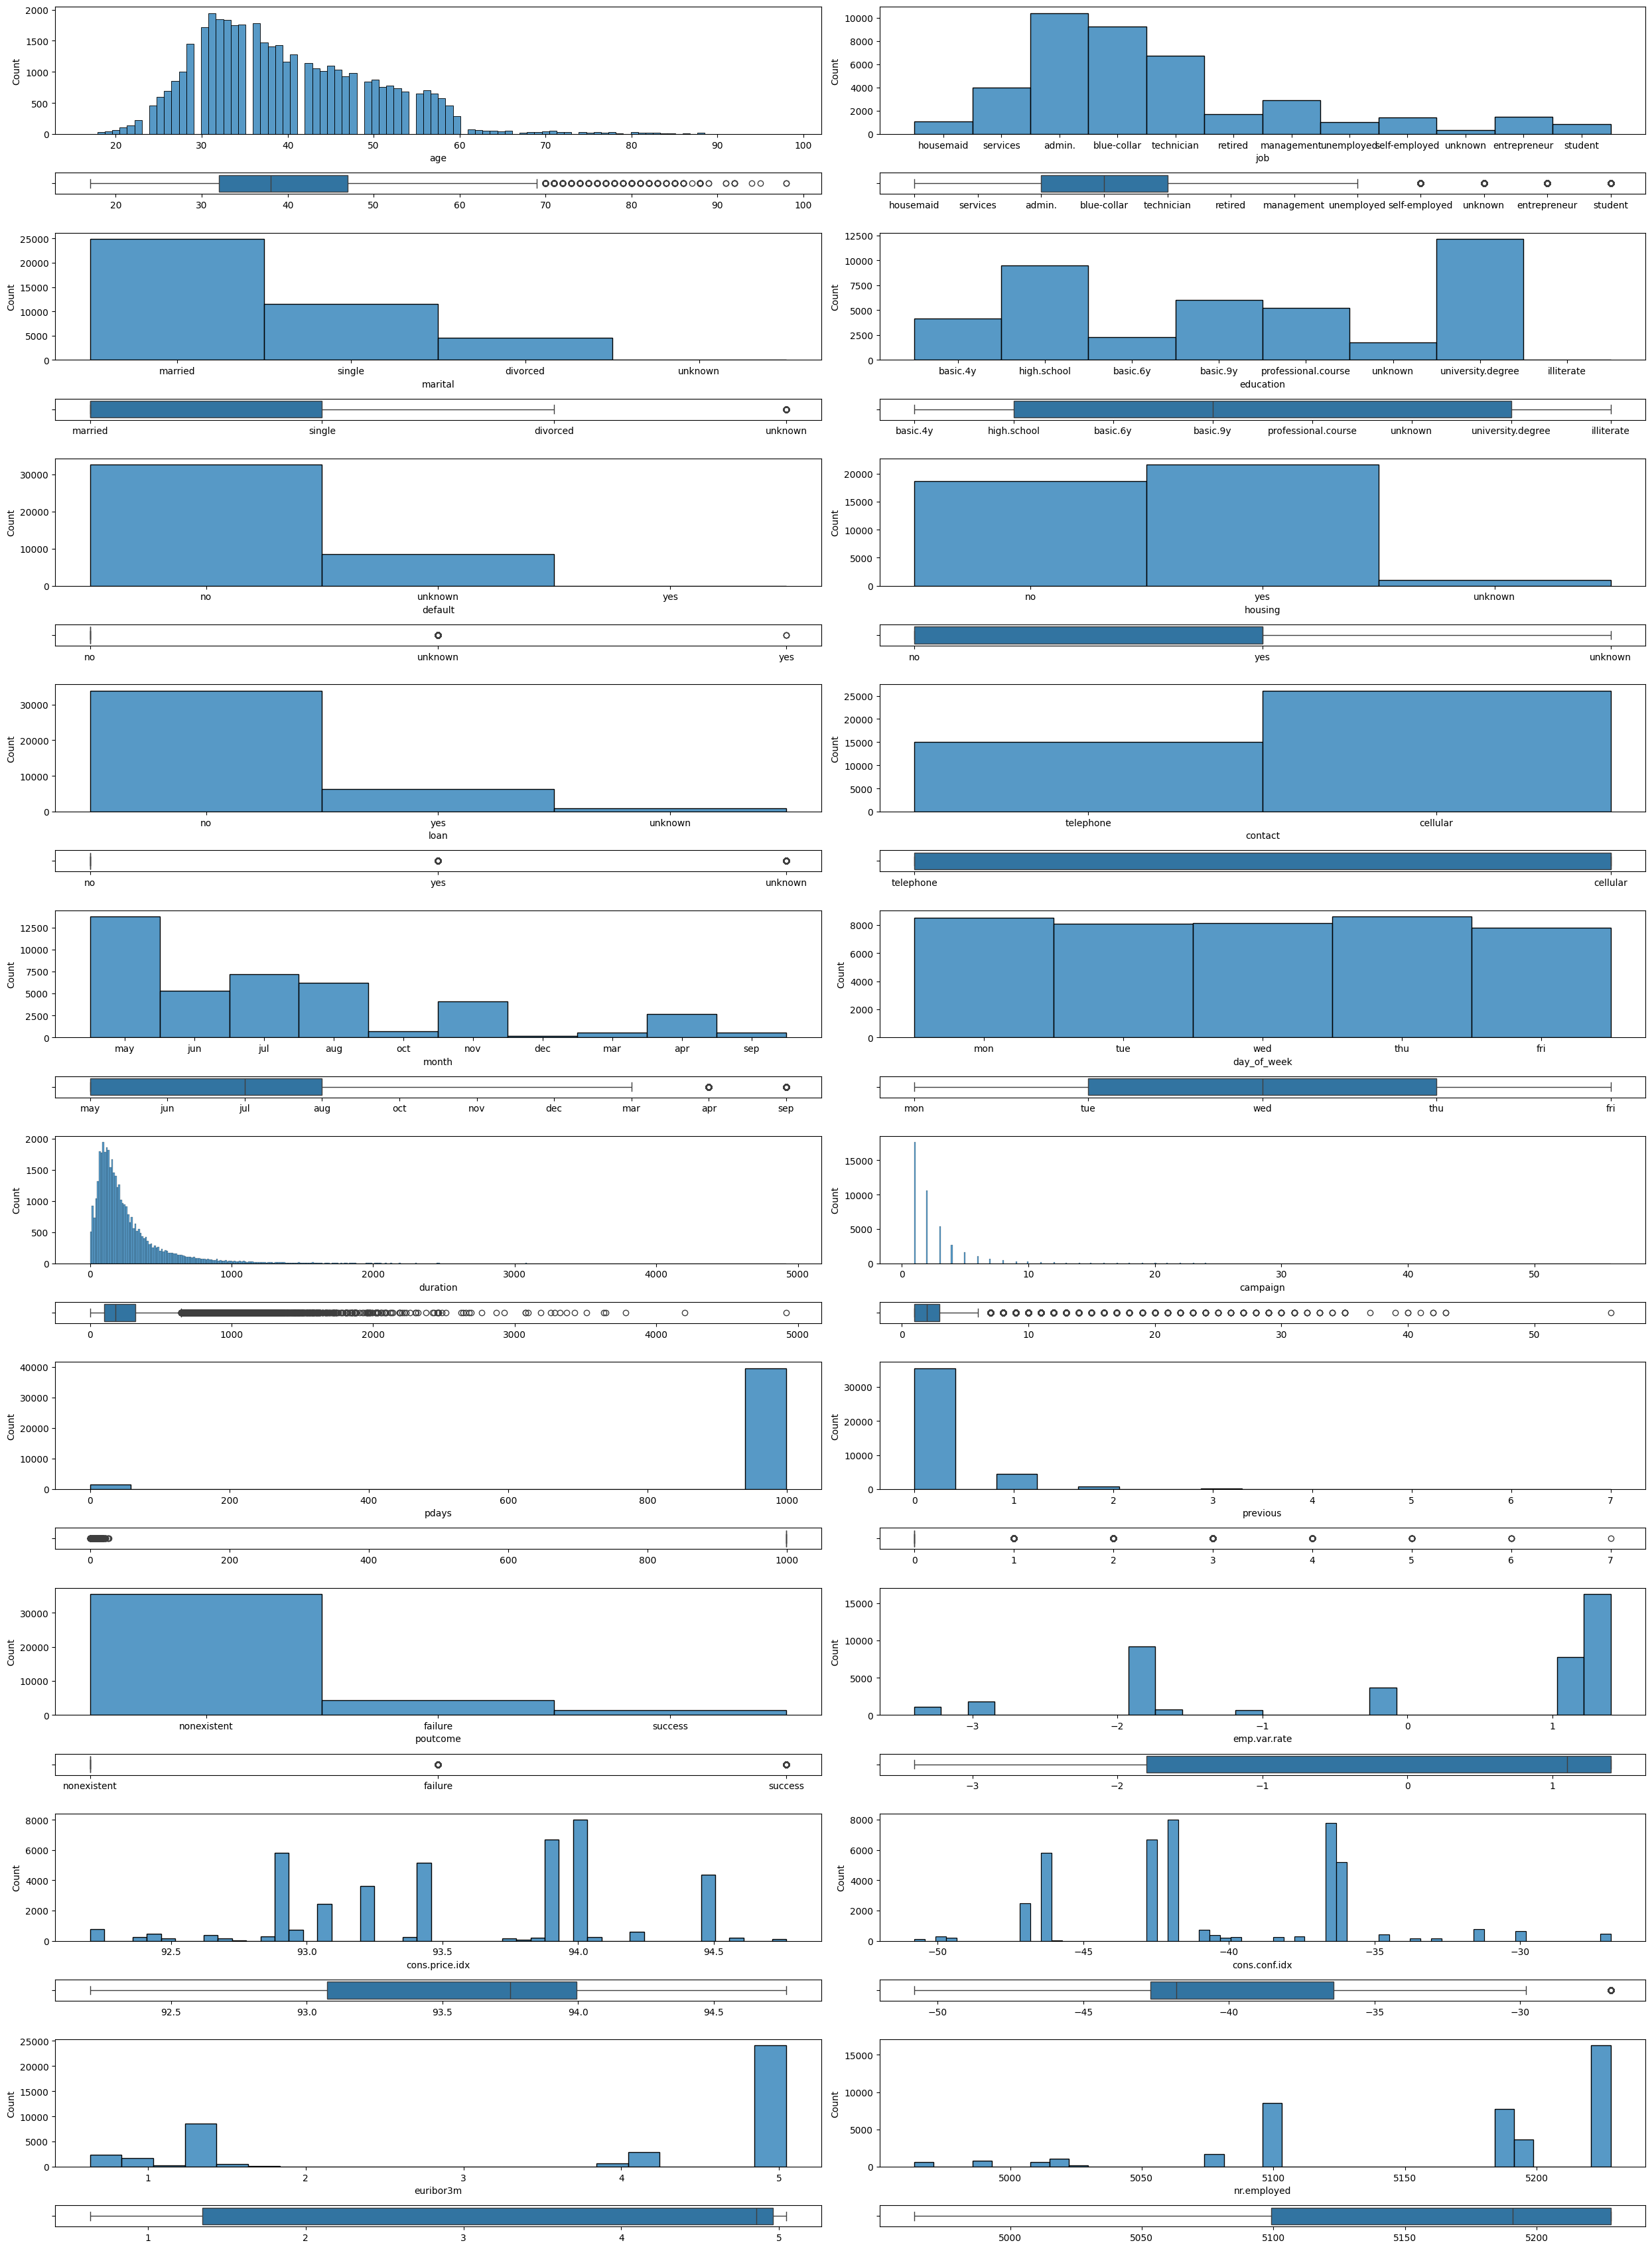

In [3]:
features = dataframe.drop(columns=["y"]).columns

fig, ax = plt.subplots(len(features), 2, figsize=(25, 34), 
                       gridspec_kw={'height_ratios': [6, 1] * (len(features) // 2)})

for i, feature in enumerate(features):
    row = (i // 2) * 2 
    col = i % 2
    sns.histplot(ax=ax[row, col], data=dataframe, x=feature)
    sns.boxplot(ax=ax[row + 1, col], data=dataframe, x=feature).set(xlabel=None)


plt.tight_layout()
plt.show()

Distribución de Variables:
Edad: La mayoría de las personas tienen entre 20 y 60 años, con un pico en los 30-40 años.

Trabajo: Las categorías más comunes son "blue-collar," "management" y "technician."

Estado Civil: La mayoría está casada, seguida de los solteros y divorciados.

Educación: Los niveles más comunes son "basic.9y," "high.school" y "university.degree."

Estado de Default: La mayoría no tiene un default, con pocos casos de "default" o "unknown."

Préstamo de Vivienda: La mayoría no tiene préstamo de vivienda.

Estado de Préstamo: La mayoría no tiene préstamos, con algunos casos de "loan" o "unknown."

Tipo de Contacto: El tipo más común de contacto es "cellular," seguido de "telephone."

Mes de Contacto: Mayo, julio y agosto son los meses más comunes de contacto.

Día de la Semana: La distribución de contacto es bastante uniforme durante la semana.

Duración del Contacto: La mayoría de los contactos duran menos de 1000 segundos.

Número de Contactos: La mayoría de los individuos fueron contactados menos de 10 veces.

Días desde el Último Contacto: La mayoría fue contactada después de un largo intervalo o nunca tuvo contacto previo.

Resultado de la Campaña Anterior: El resultado más común fue "nonexistent," seguido de "failure" y "success."

Tasa de Variación del Empleo: La distribución está centrada alrededor de 0.

Índice de Precios al Consumidor: La distribución está centrada alrededor de 93.5.

Índice de Confianza del Consumidor: La distribución está centrada alrededor de -40.

Número de Empleados: La distribución está centrada alrededor de 5000 empleados.

Conclusiones Generales:
Edad y Trabajo: La mayoría de las personas tienen entre 20-60 años, con una concentración en los 30-40 años. Los trabajos más comunes son "blue-collar," "management," y "technician."

Estado Civil y Educación: La mayoría está casada y tiene educación secundaria o universitaria.

Estabilidad Financiera: La mayoría no tiene problemas financieros importantes, ya que no tienen préstamos ni defaults.

Métodos de Contacto y Campaña: El contacto más común es "cellular," y la mayoría de los contactos ocurrieron entre mayo y agosto, con resultados de campaña principalmente "nonexistent."

Este resumen proporciona una visión general de los patrones y tendencias clave en el conjunto de datos.

In [4]:
# Listado de columnas categóricas
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for col in categorical_columns:
    dataframe[f"{col}_n"] = pd.factorize(dataframe[col])[0]

dataframe["y_n"] = dataframe["y"].map({"yes": 1, "no": 0})
if dataframe.isnull().any().any():
    print("Missing values found")
    dataframe = dataframe.dropna(axis=1)
else:
    print("No missing values")

if dataframe.duplicated().any():
    print("Duplicates found")
    dataframe.drop_duplicates(inplace=True)
else:
    print("No duplicates")
dataframe = dataframe.select_dtypes(include='number')
dataframe.describe()

No missing values
Duplicates found


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


In [5]:
def identify_outliers(df):
    outlier_info = {}
    for col in df.select_dtypes(include='number').columns:
        Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR = Q3 - Q1 

        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            outlier_info[col] = {
                'outliers_count': outliers.shape[0],
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_values': outliers[col].tolist()
            }
    for col, info in outlier_info.items():
        print(f"Column: {col} - {info['outliers_count']} outliers found")
        print(f"  Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
        print(f"  Sample Outliers: {info['outlier_values'][:5]}...\n")
    return outlier_info
outlier_info = identify_outliers(dataframe)

Column: age - 468 outliers found
  Lower Bound: 9.5, Upper Bound: 69.5
  Sample Outliers: [70, 76, 73, 88, 88]...

Column: duration - 2963 outliers found
  Lower Bound: -223.5, Upper Bound: 644.5
  Sample Outliers: [1666, 787, 812, 1575, 1042]...

Column: campaign - 2406 outliers found
  Lower Bound: -2.0, Upper Bound: 6.0
  Sample Outliers: [7, 8, 8, 7, 7]...

Column: pdays - 1515 outliers found
  Lower Bound: 999.0, Upper Bound: 999.0
  Sample Outliers: [6, 4, 4, 3, 4]...

Column: previous - 5625 outliers found
  Lower Bound: 0.0, Upper Bound: 0.0
  Sample Outliers: [1, 1, 1, 1, 1]...

Column: cons.conf.idx - 446 outliers found
  Lower Bound: -52.150000000000006, Upper Bound: -26.949999999999992
  Sample Outliers: [-26.9, -26.9, -26.9, -26.9, -26.9]...

Column: job_n - 4082 outliers found
  Lower Bound: -1.0, Upper Bound: 7.0
  Sample Outliers: [8, 9, 9, 10, 10]...

Column: marital_n - 80 outliers found
  Lower Bound: -1.5, Upper Bound: 2.5
  Sample Outliers: [3, 3, 3, 3, 3]...

Colu

In [6]:
def remove_outliers(df, outlier_info):
    for col, info in outlier_info.items():
        lower_limit = info['lower_bound']
        upper_limit = info['upper_bound']
        
        if lower_limit < 0:
            df = df[df[col] >= lower_limit]
        if upper_limit > 0:
            df = df[df[col] <= upper_limit]
    return df
df_without_outliers = remove_outliers(dataframe, outlier_info=outlier_info)
df_without_outliers.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,...,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00,29525.00
mean,39.76,204.69,2.07,969.20,0.15,0.26,93.61,-40.20,3.84,5175.70,...,0.50,3.22,0.22,0.57,0.20,0.61,1.73,1.95,0.15,0.07
std,9.50,138.99,1.30,169.41,0.45,1.50,0.57,4.36,1.64,67.07,...,0.69,2.17,0.41,0.54,0.46,0.49,1.78,1.40,0.42,0.25
min,20.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,100.00,1.00,999.00,0.00,-1.70,93.20,-42.70,1.34,5099.10,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,38.00,168.00,2.00,999.00,0.00,1.10,93.92,-41.80,4.86,5195.80,...,0.00,3.00,0.00,1.00,0.00,1.00,1.00,2.00,0.00,0.00
75%,47.00,276.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,...,1.00,6.00,0.00,1.00,0.00,1.00,3.00,3.00,0.00,0.00
max,69.00,644.00,6.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,...,2.00,7.00,2.00,2.00,2.00,1.00,7.00,4.00,2.00,1.00


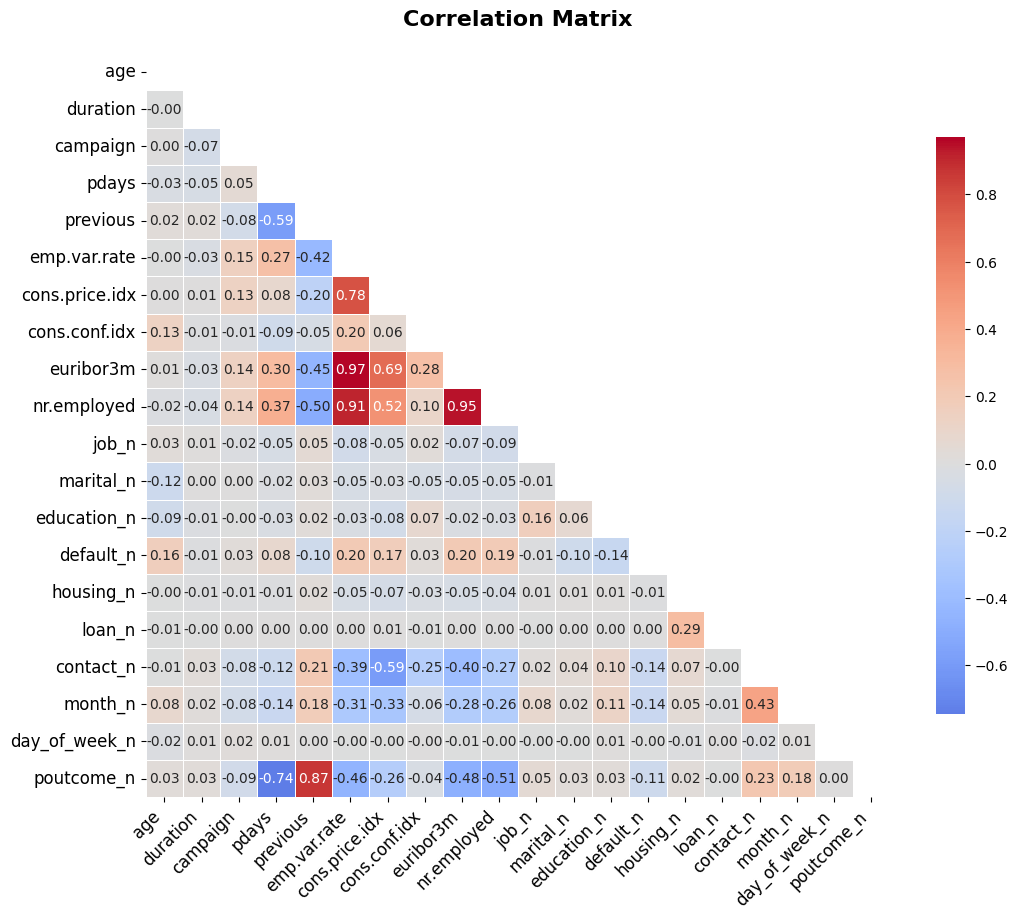

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from joblib import dump
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Función de división de los datos en entrenamiento y prueba
def train_split(target, dataframe, test_size=0.1, random_state=42):
    return train_test_split(dataframe.drop(columns=target), dataframe[target], test_size=test_size, random_state=random_state)

# Función para guardar datos
def save_data(X_train, X_test, y_train, y_test, prefix, suffix=""):
    X_train.to_csv(f'../data/processed/{prefix}_X_train{suffix}.csv', index=False)
    X_test.to_csv(f'../data/processed/{prefix}_X_test{suffix}.csv', index=False)
    y_train.to_csv(f'../data/processed/{prefix}_y_train{suffix}.csv', index=False)
    y_test.to_csv(f'../data/processed/{prefix}_y_test{suffix}.csv', index=False)

# Función de escalado
def scale_data(X_train, X_test, scaler, filename, scaler_type='std'):
    scaler.fit(X_train)
    
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    dump(scaler, f'../data/processed/{scaler_type}_transform_{filename}.sav')

    return X_train_scaled, X_test_scaled

# Función de selección de las mejores características (SelectKBest)
def select_k_best(X_train, X_test, y_train, k, filename: str):
    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    dump(selection_model, f'../data/processed/selection_model_{filename}.sav')

    return (pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]),
            pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols]))

# Función para generar un heatmap de correlación
def plot_correlation_heatmap(df, columns):
    corr_matrix = df[columns].corr()

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0,
                linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, annot_kws={"size": 10})

    plt.title("Correlation Matrix", fontsize=16, fontweight="bold", pad=20)
    plt.xticks(fontsize=12, rotation=45, ha="right")
    plt.yticks(fontsize=12)
    plt.show()

# Preparación de los datos
TARGET = 'y_n'
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_split(TARGET, dataframe, test_size=0.2, random_state=42)
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers = train_split(TARGET, df_without_outliers, test_size=0.2, random_state=42)

# Guardar los datos procesados (con y sin outliers)
save_data(X_train_with_outliers, X_test_with_outliers, y_train, y_test, 'with_outliers', '_ts_02_rs_42')
save_data(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers, 'without_outliers', '_ts_02_rs_42')

# Escalado (StandardScaler y MinMaxScaler)
X_train_with_outliers_std, X_test_with_outliers_std = scale_data(X_train_with_outliers, X_test_with_outliers, StandardScaler(), 'with_outliers', 'std')
X_train_without_outliers_std, X_test_without_outliers_std = scale_data(X_train_without_outliers, X_test_without_outliers, StandardScaler(), 'without_outliers', 'std')

X_train_with_outliers_minmax, X_test_with_outliers_minmax = scale_data(X_train_with_outliers, X_test_with_outliers, MinMaxScaler(), 'with_outliers', 'minmax')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = scale_data(X_train_without_outliers, X_test_without_outliers, MinMaxScaler(), 'without_outliers', 'minmax')

# Selección de las mejores características (SelectKBest)
K = X_train_with_outliers.shape[1]
X_train_with_outliers_selected, X_test_with_outliers_selected = select_k_best(X_train_with_outliers, X_test_with_outliers, y_train, K, 'with_outliers')
X_train_without_outliers_selected, X_test_without_outliers_selected = select_k_best(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, K, 'without_outliers')

# Correlación entre las características
plot_correlation_heatmap(dataframe, X_train_with_outliers.columns)


Una fuerte correlación positiva (0.97) entre "euribor3m" y "nr.employed".

Una fuerte correlación negativa (-0.74) entre "poutcome_n" y "emp.var.rate".

Correlaciones moderadas entre "cons.price.idx" y "euribor3m" (0.69), así como entre "cons.price.idx" y "nr.employed" (0.52).

In [8]:
X_entrenamiento_con_outliers_std_seleccionado = X_train_with_outliers_std[X_train_with_outliers_selected.columns]
X_entrenamiento_sin_outliers_std_seleccionado = X_train_without_outliers_std[X_train_without_outliers_selected.columns]

X_prueba_con_outliers_std_seleccionado = X_test_with_outliers_std[X_test_with_outliers_selected.columns]
X_prueba_sin_outliers_std_seleccionado = X_test_without_outliers_std[X_test_without_outliers_selected.columns]

X_entrenamiento_con_outliers_minmax_seleccionado = X_train_with_outliers_minmax[X_train_with_outliers_selected.columns]
X_entrenamiento_sin_outliers_minmax_seleccionado = X_train_without_outliers_minmax[X_train_without_outliers_selected.columns]

X_prueba_con_outliers_minmax_seleccionado = X_test_with_outliers_minmax[X_test_with_outliers_selected.columns]
X_prueba_sin_outliers_minmax_seleccionado = X_test_without_outliers_minmax[X_test_without_outliers_selected.columns]


In [9]:
# Diccionarios de conjuntos de datos de entrenamiento y prueba
dfs_entrenamiento = {
    'X_entrenamiento_con_outliers_seleccionado': X_train_with_outliers_selected,
    'X_entrenamiento_con_outliers_norm_seleccionado': X_entrenamiento_con_outliers_std_seleccionado,
    'X_entrenamiento_con_outliers_minmax_seleccionado': X_entrenamiento_con_outliers_minmax_seleccionado,
}

dfs_entrenamiento_sin_outliers = {
    'X_entrenamiento_sin_outliers_seleccionado': X_train_without_outliers_selected,
    'X_entrenamiento_sin_outliers_norm_seleccionado': X_entrenamiento_sin_outliers_std_seleccionado,
    'X_entrenamiento_sin_outliers_minmax_seleccionado': X_entrenamiento_sin_outliers_minmax_seleccionado
}

dfs_prueba = {
    'X_prueba_con_outliers_seleccionado': X_test_with_outliers_selected,
    'X_prueba_con_outliers_norm_seleccionado': X_prueba_con_outliers_std_seleccionado,
    'X_prueba_con_outliers_minmax_seleccionado': X_prueba_con_outliers_minmax_seleccionado,
}

dfs_prueba_sin_outliers = {
    'X_prueba_sin_outliers_seleccionado': X_test_without_outliers_selected,
    'X_prueba_sin_outliers_norm_seleccionado': X_prueba_sin_outliers_std_seleccionado,
    'X_prueba_sin_outliers_minmax_seleccionado': X_prueba_sin_outliers_minmax_seleccionado
}

# Guardar los conjuntos de datos en archivos CSV
for nombre, df in dfs_entrenamiento.items():
    df.to_csv(f"../data/processed/{nombre}.csv", index=False)

for nombre, df in dfs_prueba.items():
    df.to_csv(f'../data/processed/{nombre}.csv', index=False)

for nombre, df in dfs_entrenamiento_sin_outliers.items():
    df.to_csv(f"../data/processed/{nombre}.csv", index=False)

for nombre, df in dfs_prueba_sin_outliers.items():
    df.to_csv(f'../data/processed/{nombre}.csv', index=False)


In [10]:

# Importar métricas necesarias
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convertir diccionarios en listas de valores
entrenamiento = list(dfs_entrenamiento.values())
prueba = list(dfs_prueba.values())
entrenamiento_sin_outliers = list(dfs_entrenamiento_sin_outliers.values())
prueba_sin_outliers = list(dfs_prueba_sin_outliers.values())

resultados = []

# Modelo con datos originales
for indice, df_entrenamiento in enumerate(entrenamiento):
    modelo = LogisticRegression(random_state=42)
    modelo.fit(df_entrenamiento, y_train)
    y_predicho = modelo.predict(prueba[indice])

    resultados.append({
        'indice': indice,
        'df_entrenamiento': list(dfs_entrenamiento.keys())[indice],
        'Puntaje de Precisión': round(accuracy_score(y_test, y_predicho), 4),
        'Reporte de Clasificación': classification_report(y_test, y_predicho),
        'Matriz de Confusión': confusion_matrix(y_test, y_predicho)
    })

# Modelo sin outliers
for indice, df_entrenamiento in enumerate(entrenamiento_sin_outliers):
    modelo = LogisticRegression(random_state=42)
    modelo.fit(df_entrenamiento, y_train_without_outliers)
    y_predicho = modelo.predict(prueba_sin_outliers[indice])

    resultados.append({
        'indice': indice,
        'df_entrenamiento': list(dfs_entrenamiento_sin_outliers.keys())[indice],
        'Puntaje de Precisión': round(accuracy_score(y_test_without_outliers, y_predicho), 4),
        'Reporte de Clasificación': classification_report(y_test_without_outliers, y_predicho),
        'Matriz de Confusión': confusion_matrix(y_test_without_outliers, y_predicho)
    })

# Ordenar resultados por puntaje de precisión en orden descendente
resultados = sorted(resultados, key=lambda x: x['Puntaje de Precisión'], reverse=True)
mejor_resultado = resultados[0]

# Imprimir el mejor resultado
print(f"Índice: {mejor_resultado['indice']}")
print(f"\ndf_entrenamiento: {mejor_resultado['df_entrenamiento']}")
print(f"\nPuntaje de Precisión: {mejor_resultado['Puntaje de Precisión']}")
print(f"\nReporte de Clasificación: {mejor_resultado['Reporte de Clasificación']}")
print(f"\nMatriz de Confusión: {mejor_resultado['Matriz de Confusión']}")

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Índice: 0

df_entrenamiento: X_entrenamiento_sin_outliers_seleccionado

Puntaje de Precisión: 0.9497

Reporte de Clasificación:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5536
           1       0.67      0.38      0.49       369

    accuracy                           0.95      5905
   macro avg       0.81      0.69      0.73      5905
weighted avg       0.94      0.95      0.94      5905


Matriz de Confusión: [[5466   70]
 [ 227  142]]


In [11]:
# Búsqueda de hiperparámetros con GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

hiperparametros = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(LogisticRegression(random_state=42, class_weight="balanced"), hiperparametros, scoring='f1', cv=5, verbose=0)


In [12]:
def advertencia(*args, **kwargs):
    pass

import warnings
warnings.warn = advertencia

# Entrenar modelo con los mejores hiperparámetros
grid.fit(dfs_entrenamiento_sin_outliers.get(mejor_resultado["df_entrenamiento"]), y_train_without_outliers)

print(f'Los mejores hiperparámetros son: {grid.best_params_}')

/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/home/vscode

Los mejores hiperparámetros son: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [13]:
# Evaluar el modelo con los mejores hiperparámetros
modelo_grid = LogisticRegression(**grid.best_params_)
modelo_grid.fit(dfs_entrenamiento_sin_outliers.get(mejor_resultado["df_entrenamiento"]), y_train_without_outliers)
y_predicho = modelo_grid.predict(dfs_prueba_sin_outliers.get(list(dfs_prueba_sin_outliers)[mejor_resultado["indice"]]))
precisión_modelo_grid = round(accuracy_score(y_test_without_outliers, y_predicho), 4)

print(f'La precisión del modelo con los hiperparámetros es: {precisión_modelo_grid * 100}%, un aumento de {round(precisión_modelo_grid - (resultados[0]["Puntaje de Precisión"]), 4) * 100}% respecto al modelo predeterminado')


La precisión del modelo con los hiperparámetros es: 94.95%, un aumento de -0.02% respecto al modelo predeterminado


In [14]:
# Imprimir reporte final
print(f"Puntaje de Precisión: {precisión_modelo_grid}")
print(f"\nReporte de Clasificación: {classification_report(y_test_without_outliers, y_predicho)}")
print(f"\nMatriz de Confusión: {confusion_matrix(y_test_without_outliers, y_predicho)}")


Puntaje de Precisión: 0.9495

Reporte de Clasificación:               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5536
           1       0.67      0.38      0.49       369

    accuracy                           0.95      5905
   macro avg       0.81      0.68      0.73      5905
weighted avg       0.94      0.95      0.94      5905


Matriz de Confusión: [[5466   70]
 [ 228  141]]


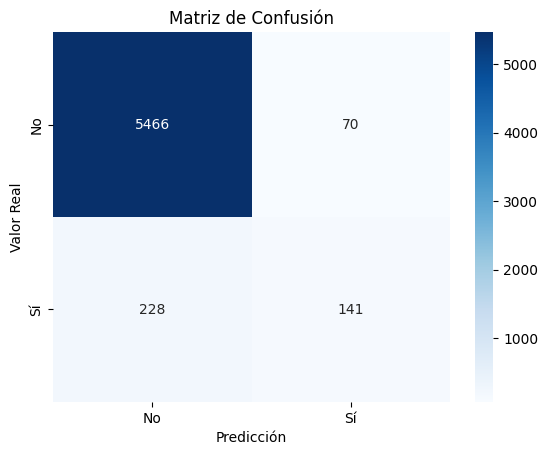

In [15]:
# Mostrar matriz de confusión como gráfico
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_without_outliers, y_predicho)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()